***LINEAR REGRESSION ON STARTUPS***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.count()

R&D Spend          29
Administration     29
Marketing Spend    29
State              29
Profit             29
dtype: int64

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [11]:
df.count()

R&D Spend          29
Administration     29
Marketing Spend    29
State              29
Profit             29
dtype: int64

In [12]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='R&D Spend'>

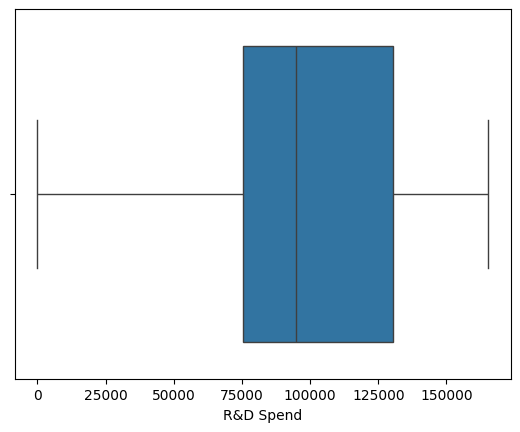

In [14]:
sns.boxplot(x=df['R&D Spend'])

In [15]:
# NO outliers found in 	R&D Spend 

<Axes: xlabel='Marketing Spend'>

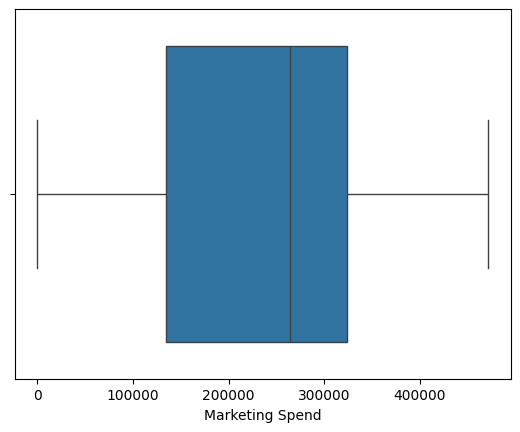

In [16]:
sns.boxplot(x=df['Marketing Spend'])

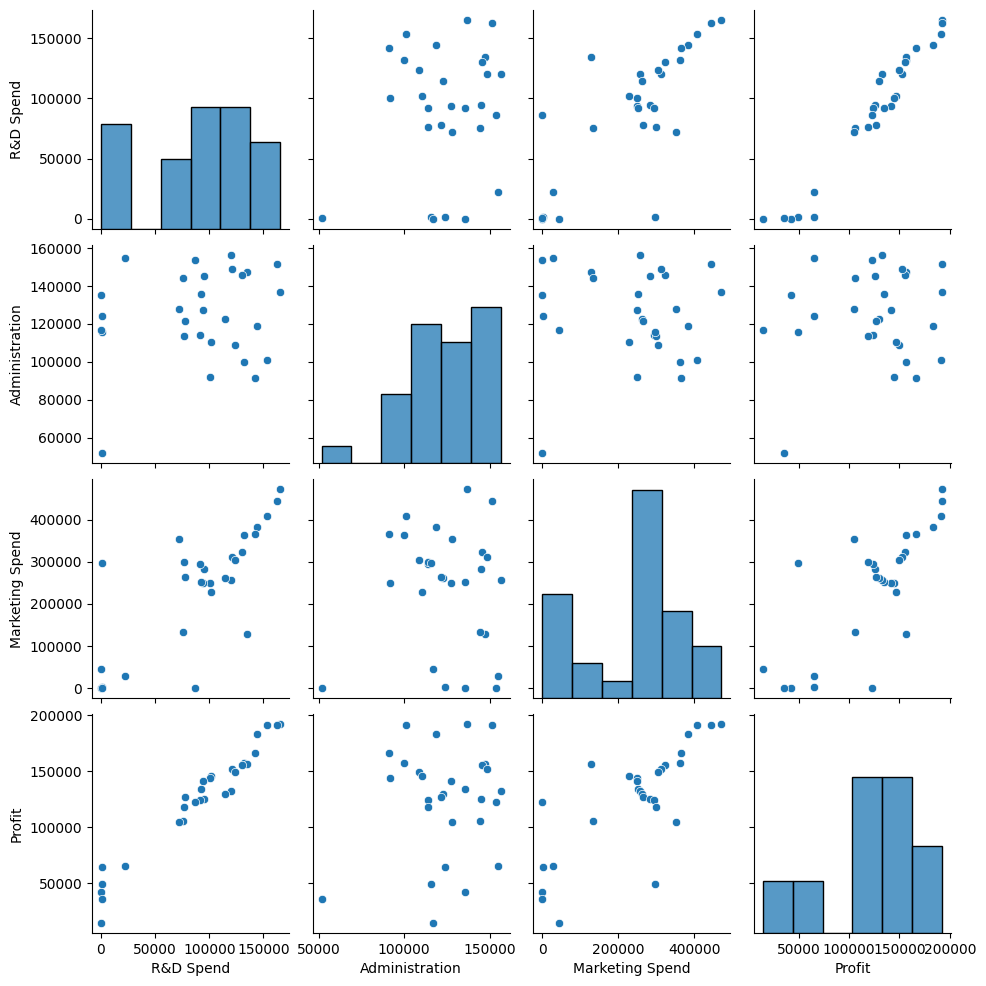

In [17]:
sns.pairplot(df)

In [ ]:
#There is no need of state here so i am going to delete this


In [19]:
del df['State']

<Axes: >

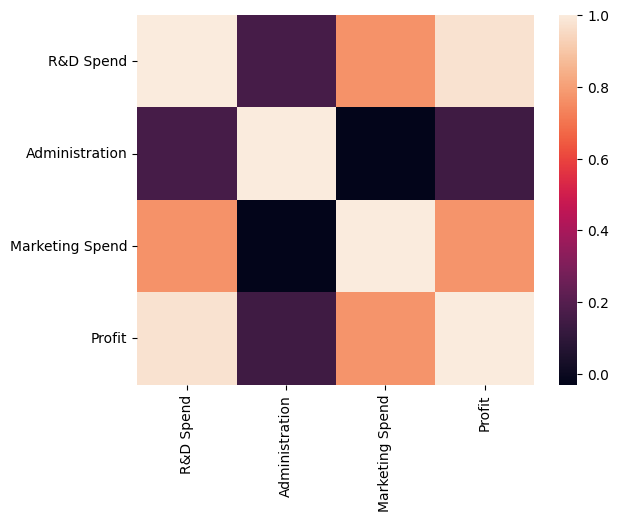

In [20]:
corr_matrix=df.corr()
#Creating a seaborn heatmap
sns.heatmap(corr_matrix)

<Axes: >

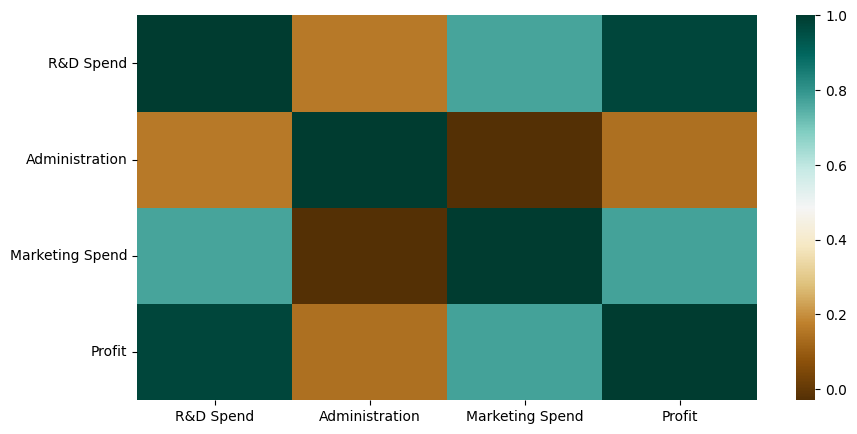

In [21]:
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG')

In [22]:
# NO outliers found in 	Marketing spend

In [23]:
# Now we transform the data into train test split

In [24]:
X=df[['R&D Spend', 'Administration', 'Marketing Spend']]
Y=df['Profit']

In [25]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [26]:
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
26    105733.54
27    105008.31
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Now we are splitting dataset into train and tesing

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=200 )


In [31]:
Ir= LinearRegression()

In [32]:
Ir.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred=Ir.predict(X_test)

In [34]:
Y_pred

array([126076.79488106,  49947.97613041, 181425.56597537, 113579.03896864,
       193204.79498433, 111367.29392598, 126651.44372   , 129069.96570955,
       151711.54464157])

In [35]:
mean_absolute_error(Y_test,Y_pred)

4121.545555959865

In [36]:
mae=mean_absolute_error(Y_test,Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 4121.55


In [37]:
Ir.score(X_test,Y_test)

0.9840098647058814

In [38]:
mape=mean_absolute_percentage_error(Y_test, Y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.03%
